# IV/dIdI Sweeps Comparison

In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import pickle

# detprocess
from detprocess import FilterData

### Data files

In [2]:
# data
sweep_files = [
    '/sdata1/runs/run57/filterdata/iv_didv_I2_D20241216_T204733/ivsweep_analysis_D20241219_T143916.hdf5',
    '/sdata1/runs/run57/filterdata/iv_didv_I2_D20241217_T214648/ivsweep_analysis_D20241219_T142608.hdf5',
    '/sdata1/runs/run57/filterdata/iv_didv_I2_D20241219_T160544/ivsweep_analysis_D20241219_T173742.hdf5',
    '/sdata1/runs/run57/filterdata/iv_didv_I2_D20241221_T140824/ivsweep_analysis_D20241222_T145653.hdf5',
    '/sdata1/runs/run57/filterdata/iv_didv_I2_D20241223_T135605/ivsweep_analysis_D20241224_T125818.hdf5',
    '/sdata1/runs/run57/filterdata/iv_didv_I2_D20241225_T181534/ivsweep_analysis_D20241226_T082847.hdf5',
    '/sdata1/runs/run57/filterdata/iv_didv_I2_D20241216_T173002/ivsweep_analysis_D20241219_T154101.hdf5',
    '/sdata1/runs/run57/filterdata/iv_didv_I2_D20241217_T194231/ivsweep_analysis_D20241219_T164714.hdf5',
    '/sdata1/runs/run57/filterdata/iv_didv_I2_D20241219_T100741/ivsweep_analysis_D20241219_T165224.hdf5',
    '/sdata1/runs/run57/filterdata/iv_didv_I2_D20241221_T104800/ivsweep_analysis_D20241222_T144615.hdf5',
    '/sdata1/runs/run57/filterdata/iv_didv_I2_D20241223_T112748/ivsweep_analysis_D20241224_T125316.hdf5',
    '/sdata1/runs/run57/filterdata/iv_didv_I2_D20241225_T181534/ivsweep_analysis_D20241226_T083228.hdf5'
]


### Load dataframes

In [3]:
dataframes = {}
for ifile, file in enumerate(sweep_files):
    filterdata = FilterData()
    filterdata.load_hdf5(file)
    channels = list(filterdata._filter_data.keys())
    for chan in channels:
        if chan not in dataframes:
            dataframes[chan] = list()
        dataframes[chan].append(filterdata.get_ivsweep_data(chan))



INFO: Loading filter data from file /sdata1/runs/run57/filterdata/iv_didv_I2_D20241216_T204733/ivsweep_analysis_D20241219_T143916.hdf5
INFO: Loading filter data from file /sdata1/runs/run57/filterdata/iv_didv_I2_D20241217_T214648/ivsweep_analysis_D20241219_T142608.hdf5
INFO: Loading filter data from file /sdata1/runs/run57/filterdata/iv_didv_I2_D20241219_T160544/ivsweep_analysis_D20241219_T173742.hdf5
INFO: Loading filter data from file /sdata1/runs/run57/filterdata/iv_didv_I2_D20241221_T140824/ivsweep_analysis_D20241222_T145653.hdf5
INFO: Loading filter data from file /sdata1/runs/run57/filterdata/iv_didv_I2_D20241223_T135605/ivsweep_analysis_D20241224_T125818.hdf5
INFO: Loading filter data from file /sdata1/runs/run57/filterdata/iv_didv_I2_D20241225_T181534/ivsweep_analysis_D20241226_T082847.hdf5
INFO: Loading filter data from file /sdata1/runs/run57/filterdata/iv_didv_I2_D20241216_T173002/ivsweep_analysis_D20241219_T154101.hdf5
INFO: Loading filter data from file /sdata1/runs/run57/

### Compare IV sweeps

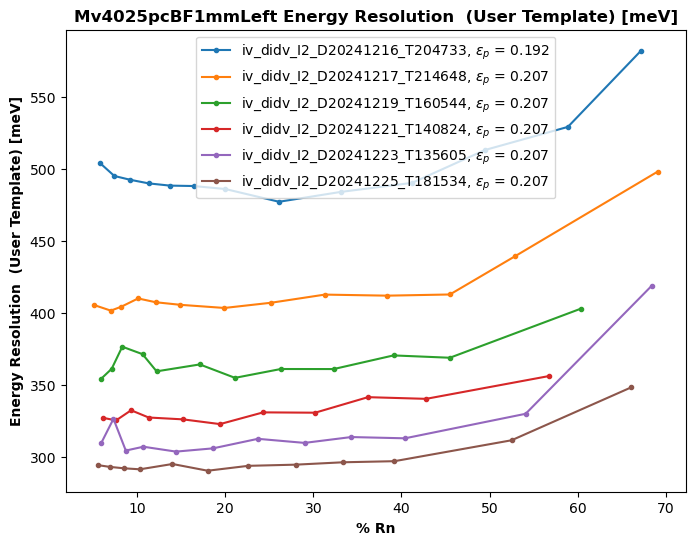

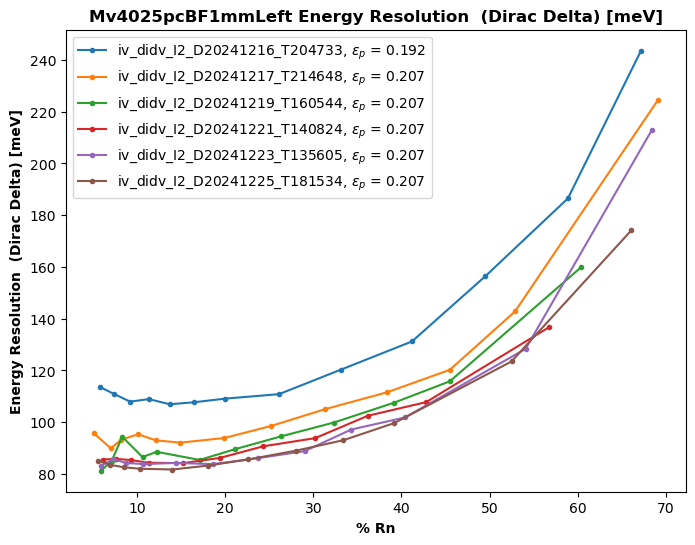

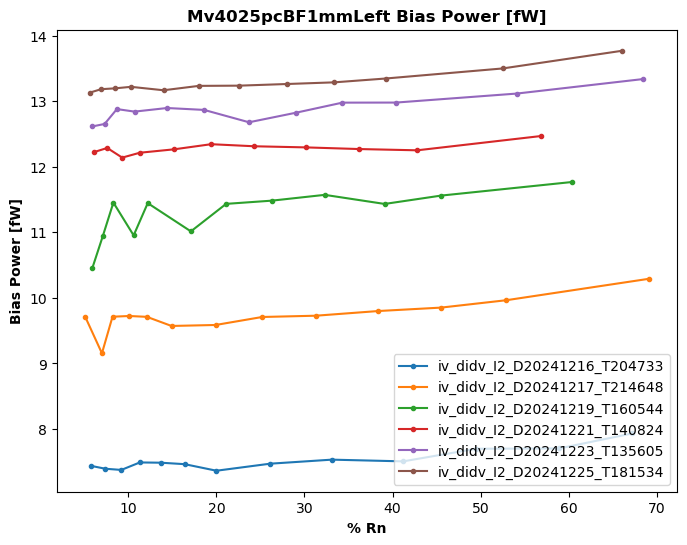

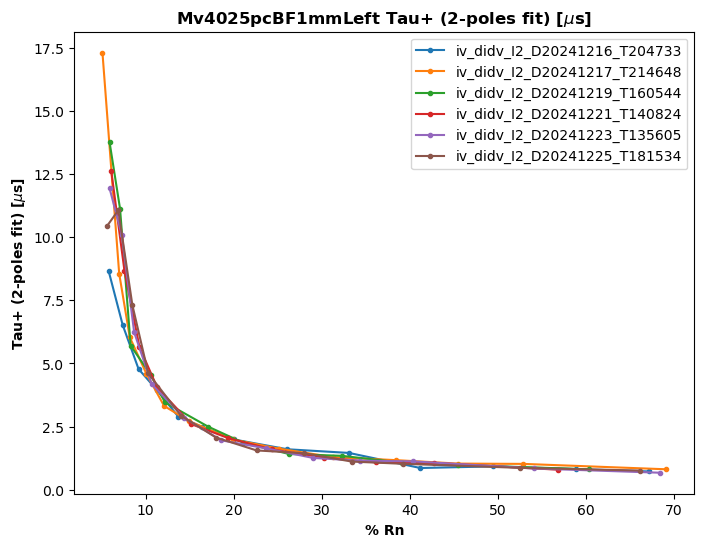

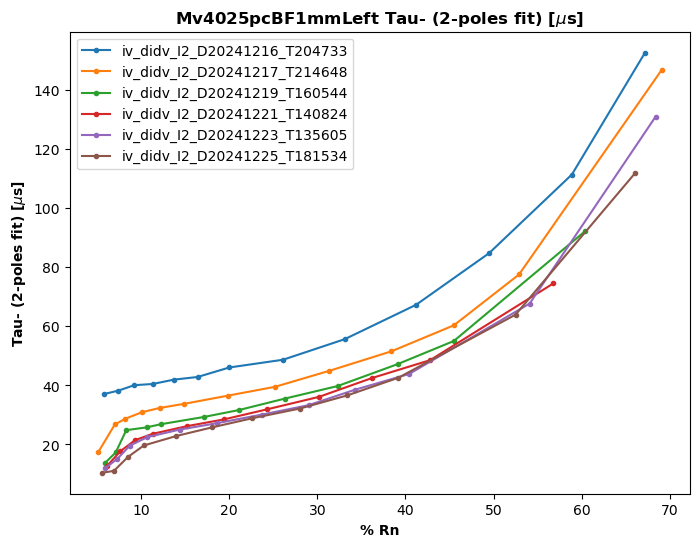

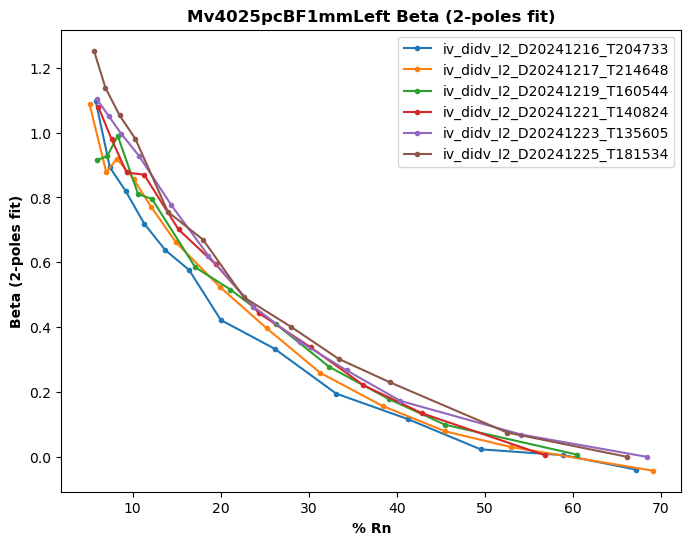

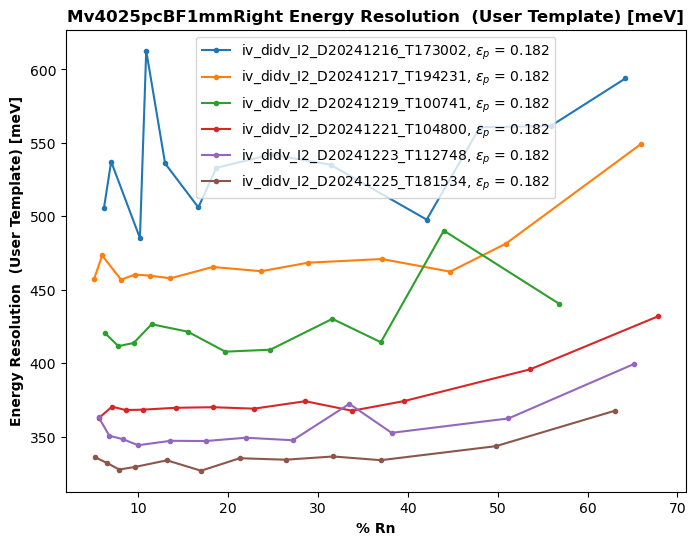

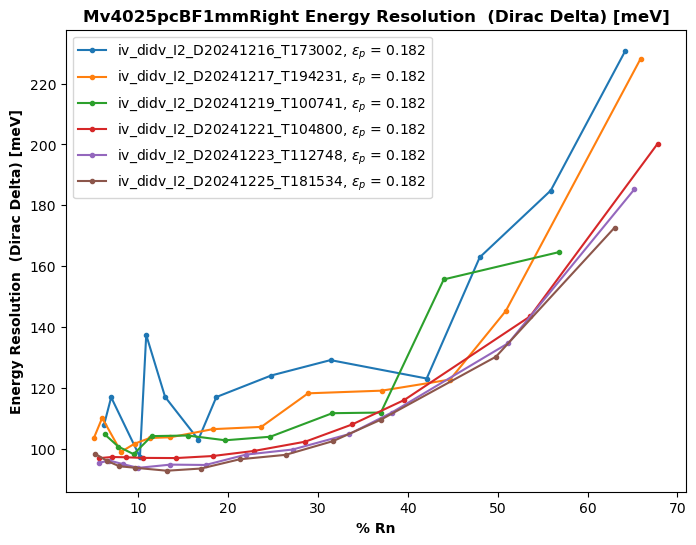

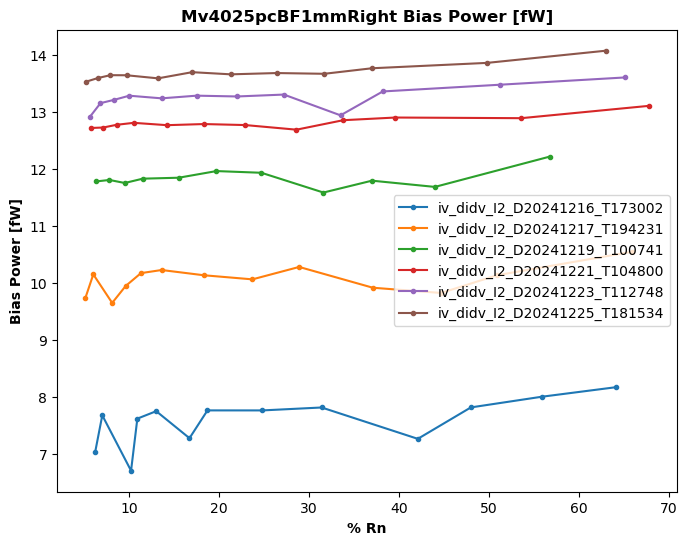

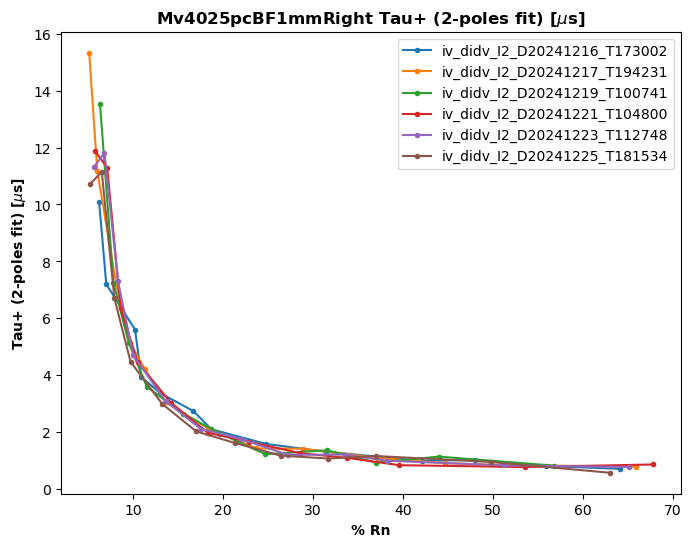

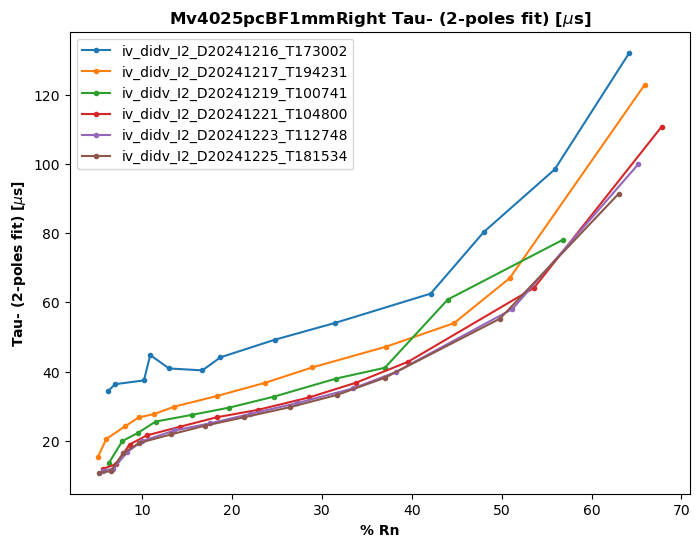

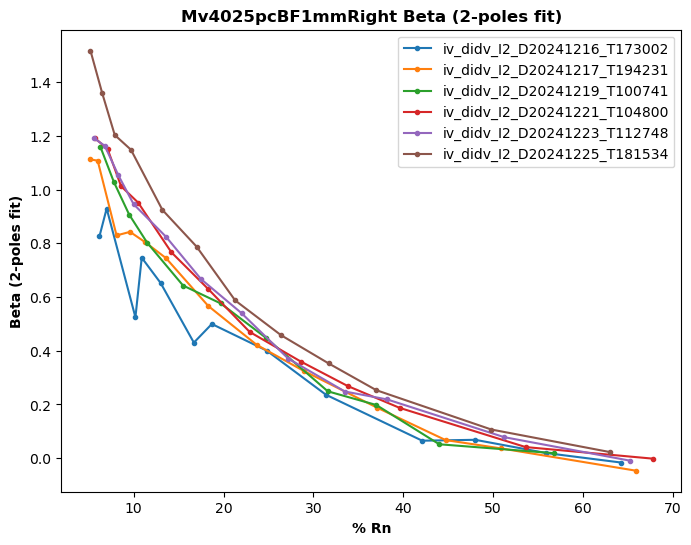

In [4]:
parameters = {
    'Energy Resolution  (User Template) [meV]': ('resolution_template', 1000),
    'Energy Resolution  (Dirac Delta) [meV]': ('resolution_dirac', 1000),
    'Bias Power [fW]': ('p0_noise', 1e15),
    'Tau+ (2-poles fit) [$\mu$s]': ('didv_2poles_tau+', 1e6),
    'Tau- (2-poles fit) [$\mu$s]': ('didv_2poles_tau-', 1e6),
    'Beta (2-poles fit)': ('didv_2poles_beta', 1),
}

for chan, chan_dataframes in dataframes.items():

    # loop parameters
    for param_title, param_tuple in parameters.items():

        # parameter name
        param_name = param_tuple[0]
        param_scale = param_tuple[1]
        
        fig, ax = plt.subplots(figsize=(8,6))
        
        for df in chan_dataframes:

            if 'percent_rn_noise' not in df.columns:
                continue
            
            # get values and calculate mask
            rn_percent = df['percent_rn_noise'].values
            resolution_dirac = df['resolution_dirac'].values
            mask = ~np.isnan(resolution_dirac)

            # IV group name
            group_name = df['group_name_didv'].values[mask][0]
    
            # pce 
            pce = df['resolution_collection_efficiency'].values[mask][0]
            
            # percent Rn
            rn_percent = df['percent_rn_noise'].values[mask]

            # parameters
            param_val = df[param_name].values[mask]*param_scale
            
            # build label
            label = f'{group_name}'
            if 'resolution' in param_name:
                label = f'{group_name}, $\epsilon_p$ = {pce}'
        
            ax.plot(rn_percent, param_val, '.-', label=label)
        
        ax.set_xlabel('% Rn', fontweight='bold')
        ax.set_ylabel(param_title, fontweight='bold')
        ax.legend()
        ax.set_title(f'{chan} {param_title}', fontweight='bold')
    